# BURGERS EQUATION

Here we solve the burgers equation $u_t + u u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=10\times\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

!pip install imageio[ffmpeg]
import imageio.v2 as imageio
import glob

## Studied cases:
- J = 101, c_f = 0.5
- J = 101, c_f = 0.8
- J = 301, c_f = 0.5

## FLUX CONSERVSTIVE FORM

In [14]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 301    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check


# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_current)   # Time step: take the max of u_current cause it is the biggest light cone
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

#we create arrays where we will store the time and the l2norm
#l2norm, time for case 1
#l2norm_cf, time _cf for case 2
#l2norm_301, time_301 for case 3
l2norm_301=[]
l2norm_301.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time_301=[]
time_301.append(0.0)

nx= 301
dx= 0.03333333333333333
dt= 0.0016666666666666666
Number of iterations= 300.0


In [15]:
#create directory where to save images
print(os.getcwd())

os.makedirs('./images_BURG', exist_ok=True)
os.listdir('./')

C:\Users\balza\Desktop\Numerical Relativity


['.ipynb_checkpoints',
 'Advection_Equation_1FTCS.ipynb',
 'Advection_Equation_1LF.ipynb',
 'Advection_Equation_Leapfrog.ipynb',
 'Advection_Equation_Leapfrog_OF_BC.ipynb',
 'Advection_Equation_LW.ipynb',
 'Advection_Equation_stepLeapfrog.ipynb',
 'Advection_Equation_StepLF.ipynb',
 'Advection_Equation_StepLW.ipynb',
 'Burgers_eq.ipynb',
 'images_BURG',
 'images_BURG_non',
 'images_FTCS',
 'images_leapfrog',
 'images_LF',
 'images_LW',
 'images_stepleapfrog',
 'images_stepLF',
 'images_stepLW',
 'l2norm_FTCS.dat',
 'l2norm_LAX.dat',
 'l2norm_LAXWENDROFF.dat',
 'l2norm_LEAPFROG.dat',
 'movie_BURG.mp4',
 'movie_BURG_non.mp4',
 'movie_FTCS.mp4',
 'movie_leapfrog.mp4',
 'movie_LF.mp4',
 'movie_LW.mp4',
 'movie_step.mp4',
 'movie_stepleapfrog.mp4',
 'movie_stepLF.mp4',
 'movie_stepLW.mp4']

In [16]:
# Initilize time and iteration counter
t = 0.0
i = 0

u_iter=[]
t_iter=[]

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.savefig('./images_BURG/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - dt/(2*dx)*(u_current**2 - np.roll(u_current, 1)**2)    
    dt = cf*dx/np.max(u_current)
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    #change them for aLL the three cases
    l2norm_301.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time_301.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%5==0):
        u_iter.append(u_current)
        t_iter.append(t)
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        #plt.ylim(0,1.1)
        plt.savefig('./images_BURG/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

print(i/5)

53.8


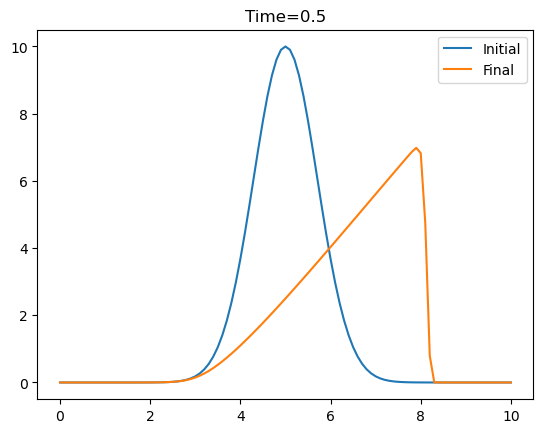

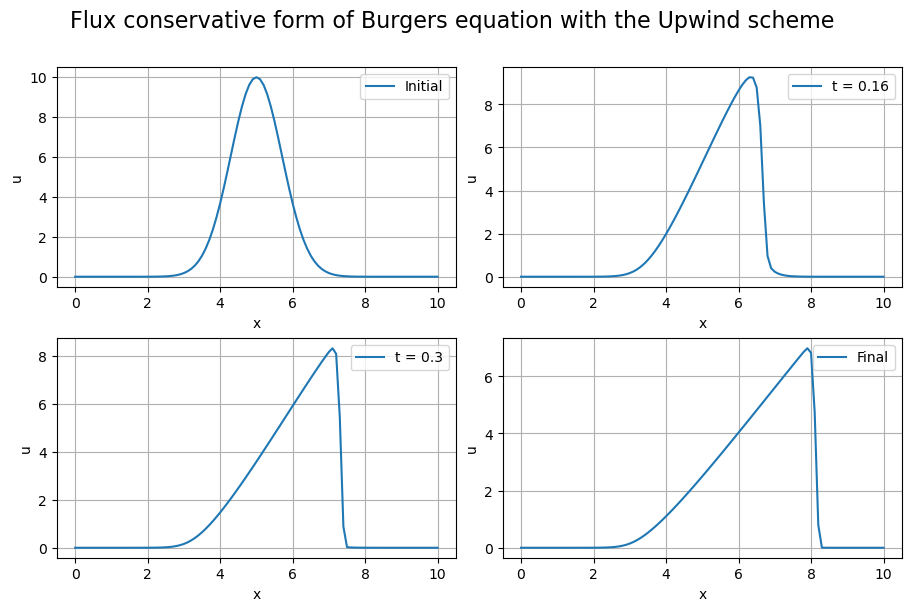

In [64]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.legend()
plt.show()

#change the figure name for each cases
fig, ax = plt.subplots(2,2, figsize=(9, 6), constrained_layout=True)
ax[0,0].plot(x, u_initial, label='Initial')
ax[0,1].plot(x, u_iter[5], label='t = %s' %round(t_iter[5],2))
ax[1,0].plot(x, u_iter[10], label='t = %s' %round(t_iter[10],2))
ax[1,1].plot(x, u_current, label='Final')
fig.suptitle('Flux conservative form of Burgers equation with the Upwind scheme \n', fontsize=16)
for i in range(len(ax[:,0])):
    for j in range(len(ax[0,:])):
        ax[i,j].set_xlabel('x')
        ax[i,j].set_ylabel('u')
        #ax[i,j].set_ylim(0,1.1)
        ax[i,j].legend()
        ax[i,j].grid(True)
#plt.savefig('./images_BURG/BURG_plot_1.png', dpi=200)
plt.show()

In [35]:
# set the directory where your images are stored
directory = "./images_BURG/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
images_files=sorted(glob.glob('./images_BURG/fig_*.png'))

print(images_files)

['BURG_plot_1.png', 'fig_00000.png', 'fig_00005.png', 'fig_00010.png', 'fig_00015.png', 'fig_00020.png', 'fig_00025.png', 'fig_00030.png', 'fig_00035.png', 'fig_00040.png', 'fig_00045.png', 'fig_00050.png', 'fig_00055.png', 'fig_00060.png', 'fig_00065.png', 'fig_00070.png', 'fig_00075.png', 'fig_00080.png', 'fig_00085.png', 'fig_00090.png'] 

['./images_BURG\\fig_00000.png', './images_BURG\\fig_00005.png', './images_BURG\\fig_00010.png', './images_BURG\\fig_00015.png', './images_BURG\\fig_00020.png', './images_BURG\\fig_00025.png', './images_BURG\\fig_00030.png', './images_BURG\\fig_00035.png', './images_BURG\\fig_00040.png', './images_BURG\\fig_00045.png', './images_BURG\\fig_00050.png', './images_BURG\\fig_00055.png', './images_BURG\\fig_00060.png', './images_BURG\\fig_00065.png', './images_BURG\\fig_00070.png', './images_BURG\\fig_00075.png', './images_BURG\\fig_00080.png', './images_BURG\\fig_00085.png', './images_BURG\\fig_00090.png']


In [36]:
#import imageio.v2 as imageio
#with imageio.get_writer('./movie.mp4', mode='I') as writer:
#    for file in files:
#        image = imageio.imread('./images/'+file)
#        writer.append_data(image)
        
#files=[]

output_video_path = os.path.abspath('./movie_BURG.mp4')
with imageio.get_writer(output_video_path, fps=20, codec='libx264') as writer:
    for file in images_files:
        image = imageio.imread(file)
        writer.append_data(image)

In [37]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie_BURG.mp4" type="video/mp4">
</video></div>""")

## L2-norm for all the three studied cases

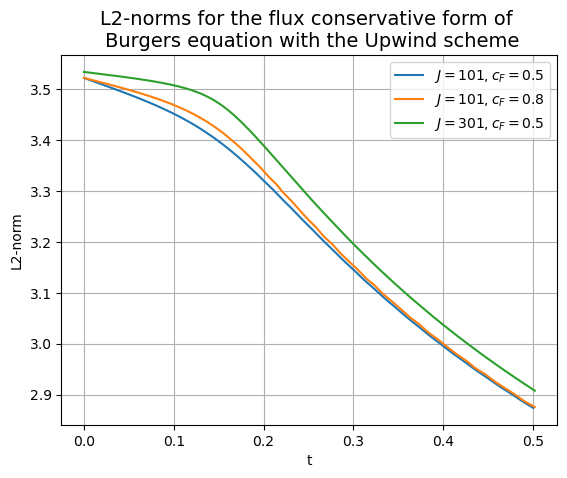

In [18]:
plt.plot(time,l2norm, label='$J=101, c_F=0.5$')
plt.plot(time_cf,l2norm_cf, label='$J=101, c_F=0.8$')
plt.plot(time_301,l2norm_301,label='$J=301, c_F=0.5$')
#plt.plot(time_2,l2norm_2, label='$J=401, c_F=0.8$')
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.title('L2-norms for the flux conservative form of \n Burgers equation with the Upwind scheme', fontsize=14)
plt.savefig('./images_BURG/L2_BURG_plot.png', dpi=200)
plt.show()

## NON FLUX CONSERVATIVE FORM

In [27]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 301    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check


# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current_non = u_initial.copy()

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_current_non)   # Time step: take the max of u_current cause it is the biggest light cone
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

#we create arrays where we will store the time and the l2norm
l2normN_301=[]
l2normN_301.append(np.sqrt(np.sum(u_current_non**2)/len(u_current_non)))

timeN_301=[]
timeN_301.append(0.0)

nx= 301
dx= 0.03333333333333333
dt= 0.0016666666666666666
Number of iterations= 300.0


In [28]:
#create directory where to save images
print(os.getcwd())

os.makedirs('./images_BURG_non', exist_ok=True)
os.listdir('./')

C:\Users\balza\Desktop\Numerical Relativity


['.ipynb_checkpoints',
 'Advection_Equation_1FTCS.ipynb',
 'Advection_Equation_1LF.ipynb',
 'Advection_Equation_Leapfrog.ipynb',
 'Advection_Equation_Leapfrog_OF_BC.ipynb',
 'Advection_Equation_LW.ipynb',
 'Advection_Equation_stepLeapfrog.ipynb',
 'Advection_Equation_StepLF.ipynb',
 'Advection_Equation_StepLW.ipynb',
 'Burgers_eq.ipynb',
 'images_BURG',
 'images_BURG_non',
 'images_FTCS',
 'images_leapfrog',
 'images_LF',
 'images_LW',
 'images_stepleapfrog',
 'images_stepLF',
 'images_stepLW',
 'l2norm_FTCS.dat',
 'l2norm_LAX.dat',
 'l2norm_LAXWENDROFF.dat',
 'l2norm_LEAPFROG.dat',
 'movie_BURG.mp4',
 'movie_BURG_non.mp4',
 'movie_FTCS.mp4',
 'movie_leapfrog.mp4',
 'movie_LF.mp4',
 'movie_LW.mp4',
 'movie_step.mp4',
 'movie_stepleapfrog.mp4',
 'movie_stepLF.mp4',
 'movie_stepLW.mp4']

In [29]:
# Initilize time and iteration counter
t = 0.0
i = 0

u_iter=[]
t_iter=[]

#save the initial conditions
plt.plot(x, u_current_non)
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.savefig('./images_BURG_non/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next_non = u_current_non - (dt/dx)*u_current_non*(u_current_non - np.roll(u_current_non, 1))    
    dt = cf*dx/np.max(u_current_non)
    # Update the solution
    u_current_non = u_next_non.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2normN_301.append(np.sqrt(np.sum(u_current_non**2)/len(u_current_non)))
    timeN_301.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%5==0):
        u_iter.append(u_current_non)
        t_iter.append(t)
        plt.plot(x, u_current_non)
        plt.title('Time='+str(round(t,2)))
        #plt.ylim(0,1.1)
        plt.savefig('./images_BURG_non/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()
print(i/5)

50.6


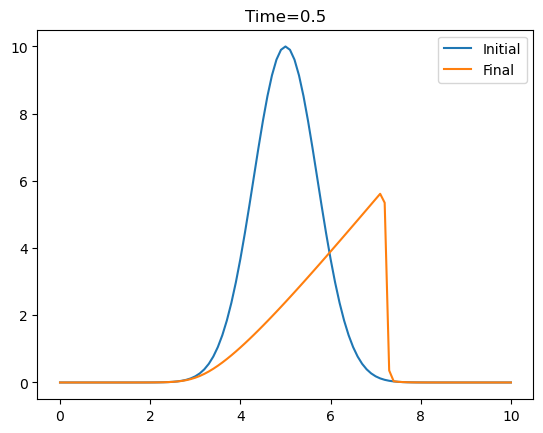

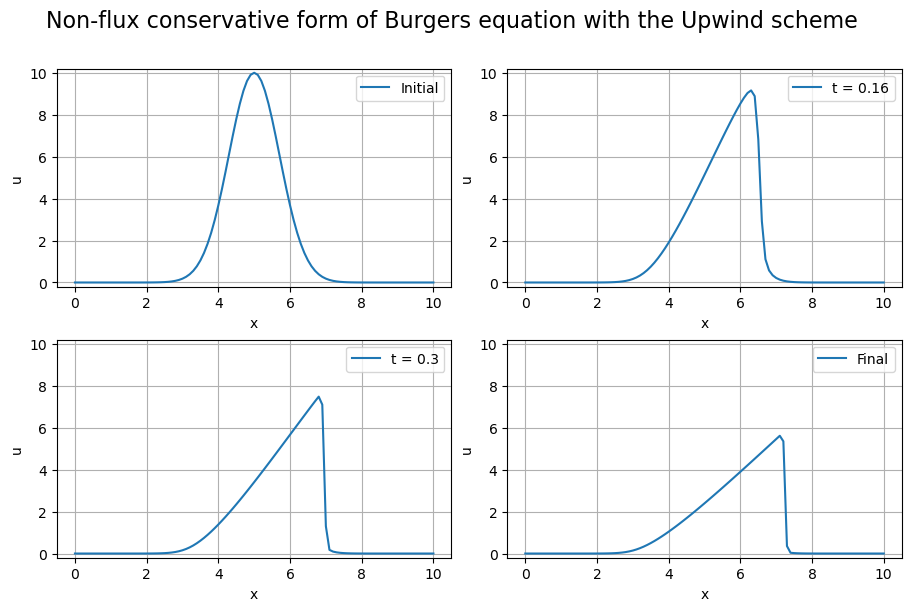

In [117]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current_non, label='Final')
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.legend()
plt.show()

fig, ax = plt.subplots(2,2, figsize=(9, 6), constrained_layout=True)
ax[0,0].plot(x, u_initial, label='Initial')
ax[0,1].plot(x, u_iter[5], label='t = %s' %round(t_iter[5],2))
ax[1,0].plot(x, u_iter[10], label='t = %s' %round(t_iter[10],2))
ax[1,1].plot(x, u_current_non, label='Final')
fig.suptitle('Non-flux conservative form of Burgers equation with the Upwind scheme \n', fontsize=16)
for i in range(len(ax[:,0])):
    for j in range(len(ax[0,:])):
        ax[i,j].set_xlabel('x')
        ax[i,j].set_ylabel('u')
        ax[i,j].set_ylim(-0.2,10.2)
        #ax[i,j].set_ylim(0,1.1)
        ax[i,j].legend()
        ax[i,j].grid(True)
plt.savefig('./images_BURG_non/BURGnon_plot_1.png', dpi=200)
plt.show()

In [64]:
# set the directory where your images are stored
directory = "./images_BURG_non/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
images_files=sorted(glob.glob('./images_BURG_non/fig_*.png'))

print(images_files)

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00180.png', 'fig_00190.png', 'fig_00200.png', 'fig_00210.png', 'fig_00220.png', 'fig_00230.png', 'fig_00240.png', 'fig_00250.png', 'fig_00260.png', 'fig_00270.png', 'fig_00280.png', 'fig_00290.png', 'fig_00300.png', 'fig_00310.png', 'fig_00320.png', 'fig_00330.png'] 

['./images_BURG_non\\fig_00000.png', './images_BURG_non\\fig_00010.png', './images_BURG_non\\fig_00020.png', './images_BURG_non\\fig_00030.png', './images_BURG_non\\fig_00040.png', './images_BURG_non\\fig_00050.png', './images_BURG_non\\fig_00060.png', './images_BURG_non\\fig_00070.png', './images_BURG_non\\fig_00080.png', './images_BURG_non\\fig_00090.png', './images_BURG_non\\fig_00100.png', './images_BURG_non\\fi

In [65]:
output_video_path = os.path.abspath('./movie_BURG_non.mp4')
with imageio.get_writer(output_video_path, fps=20, codec='libx264') as writer:
    for file in images_files:
        image = imageio.imread(file)
        writer.append_data(image)

In [66]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie_BURG_non.mp4" type="video/mp4">
</video></div>""")

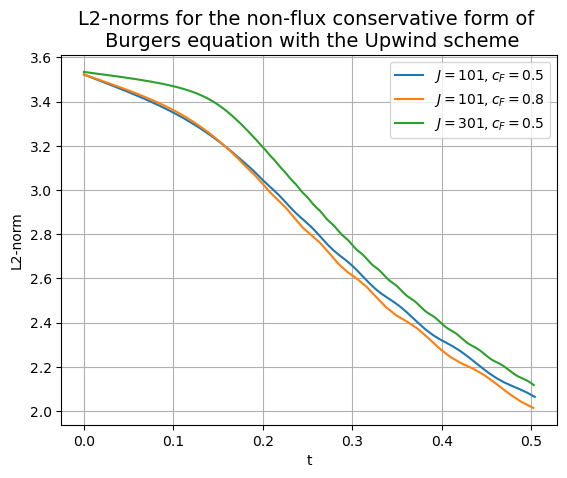

In [30]:
plt.plot(timeN,l2normN, label='$J=101, c_F=0.5$')
plt.plot(timeN_cf,l2normN_cf, label='$J=101, c_F=0.8$')
plt.plot(timeN_301,l2normN_301,label='$J=301, c_F=0.5$')
#plt.plot(time_2,l2norm_2, label='$J=401, c_F=0.8$')
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.title('L2-norms for the non-flux conservative form of \n Burgers equation with the Upwind scheme', fontsize=14)
plt.savefig('./images_BURG_non/L2_BURGnon_plot.png', dpi=200)
plt.show()

## Compare the two solution

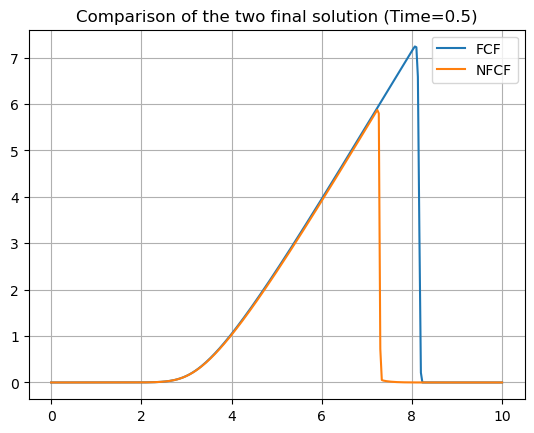

In [138]:
plt.plot(x, u_current, label='FCF')
plt.plot(x, u_current_non, label='NFCF')
plt.title('Comparison of the two final solution (Time=0.5)')
plt.grid(True)
#plt.ylim(0,1.1)
plt.legend()
plt.savefig('./images_BURG_non/BURG_comp_301.png', dpi=200)
plt.savefig('./images_BURG/BURG_comp_301.png', dpi=200)
plt.show()